In [ ]:
Цель этой тетрадки - обучиться технике получения эмбэддингов посредством обучения модели Word2Vec.
Так как предназначение этой тетрадки чисто учебное не было поставлено цели проведения долгого процесса 
обучения для достижения наиболее точной генерации. В качестве корпуса были использованы два текста 
поэмы "Мертвые души" Н. В. Гоголя на русском и английском языках. Выбор пал именно на этот роман ввиду 
специфики лексики и большого числа действующих персонажей.

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
Сперва поработаем с текстом в целях создания сперва корпуса, а затем и датасета для обучения.

In [164]:
with open('Гоголь Николай. Мертвые души - royallib.ru.txt', 'r') as file:
    text = file.read()

In [165]:
with open('Dead_Souls.txt', 'rb') as file:
    text_en = file.read().decode('utf-8', errors='ignore')

In [166]:
text[:1000]

'В ворота гостиницы губернского города NN въехала довольно красивая рессорная небольшая бричка, в какой ездят холостяки: отставные подполковники, штабс-капитаны, помещики, имеющие около сотни душ крестьян,\xa0— словом, все те, которых называют господами средней руки. В бричке сидел господин, не красавец, но и не дурной наружности, ни слишком толст, ни слишком тонок; нельзя сказать, чтобы стар, однако ж и не так, чтобы слишком молод. Въезд его не произвел в городе совершенно никакого шума и не был сопровожден ничем особенным; только два русские мужика, стоявшие у дверей кабака против гостиницы, сделали кое-какие замечания, относившиеся, впрочем, более к экипажу, чем к сидевшему в нем. «Вишь ты,\xa0— сказал один другому,\xa0— вон какое колесо! что ты думаешь, доедет то колесо, если б случилось, в Москву или не доедет?» — «Доедет»,\xa0— отвечал другой. «А в Казань-то, я думаю, не доедет?» — «В Казань не доедет»,\xa0— отвечал другой. Этим разговор и кончился Да еще, когда бричка подъехала 

In [167]:
text_en[:1000]

'To the door of an inn in the provincial town of N. there drew up a smart\r\nbritchka--a light spring-carriage of the sort affected by bachelors,\r\nretired lieutenant-colonels, staff-captains, land-owners possessed of\r\nabout a hundred souls, and, in short, all persons who rank as gentlemen\r\nof the intermediate category. In the britchka was seated such a\r\ngentleman--a man who, though not handsome, was not ill-favoured, not\r\nover-fat, and not over-thin. Also, though not over-elderly, he was\r\nnot over-young. His arrival produced no stir in the town, and was\r\naccompanied by no particular incident, beyond that a couple of peasants\r\nwho happened to be standing at the door of a dramshop exchanged a few\r\ncomments with reference to the equipage rather than to the individual\r\nwho was seated in it. “Look at that carriage,” one of them said to the\r\nother. “Think you it will be going as far as Moscow?” “I think it will,”\r\nreplied his companion. “But not as far as Kazan, eh?” 

In [168]:
cleaned_text_ru = text.replace('\n', ' ').replace('\xa0', ' ')

In [169]:
cleaned_text_ru = re.sub(r'(Глава\s+\w+)', '', cleaned_text_ru)

In [170]:
cleaned_text_ru = re.sub(r'\s+', ' ', cleaned_text_ru).strip()

In [171]:
cleaned_text_ru[:1000]

'В ворота гостиницы губернского города NN въехала довольно красивая рессорная небольшая бричка, в какой ездят холостяки: отставные подполковники, штабс-капитаны, помещики, имеющие около сотни душ крестьян, — словом, все те, которых называют господами средней руки. В бричке сидел господин, не красавец, но и не дурной наружности, ни слишком толст, ни слишком тонок; нельзя сказать, чтобы стар, однако ж и не так, чтобы слишком молод. Въезд его не произвел в городе совершенно никакого шума и не был сопровожден ничем особенным; только два русские мужика, стоявшие у дверей кабака против гостиницы, сделали кое-какие замечания, относившиеся, впрочем, более к экипажу, чем к сидевшему в нем. «Вишь ты, — сказал один другому, — вон какое колесо! что ты думаешь, доедет то колесо, если б случилось, в Москву или не доедет?» — «Доедет», — отвечал другой. «А в Казань-то, я думаю, не доедет?» — «В Казань не доедет», — отвечал другой. Этим разговор и кончился Да еще, когда бричка подъехала к гостинице, вс

In [172]:
symbols = ['\n', '\r', '\xe2', '\x80','\x9d', '\x9c', '--a'] 

for symbol in symbols:
        cleaned_text_en = text_en.replace(symbol, ' ')

In [173]:
cleaned_text_en = re.sub(r'\s+', ' ', cleaned_text_en).strip()

In [174]:
cleaned_text_en[:1000]

'To the door of an inn in the provincial town of N. there drew up a smart britchka light spring-carriage of the sort affected by bachelors, retired lieutenant-colonels, staff-captains, land-owners possessed of about a hundred souls, and, in short, all persons who rank as gentlemen of the intermediate category. In the britchka was seated such a gentleman man who, though not handsome, was not ill-favoured, not over-fat, and not over-thin. Also, though not over-elderly, he was not over-young. His arrival produced no stir in the town, and was accompanied by no particular incident, beyond that a couple of peasants who happened to be standing at the door of a dramshop exchanged a few comments with reference to the equipage rather than to the individual who was seated in it. “Look at that carriage,” one of them said to the other. “Think you it will be going as far as Moscow?” “I think it will,” replied his companion. “But not as far as Kazan, eh?” “No, not as far as Kazan.” With that the conv

In [175]:
corpus_ru = re.split(r'(?<=[?.!])\s+', cleaned_text_ru)

In [176]:
corpus_ru = [re.sub(r'(?<!\d)[^\w\s/-](?!\d)', '', sentence) for sentence in corpus_ru]

In [156]:
corpus_en = re.split(r'(?<=[?.!])\s+', cleaned_text_en)

In [100]:
corpus_ru

['В ворота гостиницы губернского города NN въехала довольно красивая рессорная небольшая бричка в какой ездят холостяки отставные подполковники штабс-капитаны помещики имеющие около сотни душ крестьян  словом все те которых называют господами средней руки',
 'В бричке сидел господин не красавец но и не дурной наружности ни слишком толст ни слишком тонок нельзя сказать чтобы стар однако ж и не так чтобы слишком молод',
 'Въезд его не произвел в городе совершенно никакого шума и не был сопровожден ничем особенным только два русские мужика стоявшие у дверей кабака против гостиницы сделали кое-какие замечания относившиеся впрочем более к экипажу чем к сидевшему в нем',
 'Вишь ты  сказал один другому  вон какое колесо',
 'что ты думаешь доедет то колесо если б случилось в Москву или не доедет  Доедет  отвечал другой',
 'А в Казань-то я думаю не доедет  В Казань не доедет  отвечал другой',
 'Этим разговор и кончился Да еще когда бричка подъехала к гостинице встретился молодой человек в белых

In [177]:
corpus_en = [re.sub(r'(?<!\d)[^\w\s/-](?!\d)', '', sentence) for sentence in corpus_en]

In [178]:
corpus_en = [re.sub(r'[^\w\s]', '', sentence) for sentence in corpus_en]

In [179]:
corpus_en[:1000]

['To the door of an inn in the provincial town of N',
 'there drew up a smart britchka light springcarriage of the sort affected by bachelors retired lieutenantcolonels staffcaptains landowners possessed of about a hundred souls and in short all persons who rank as gentlemen of the intermediate category',
 'In the britchka was seated such a gentleman man who though not handsome was not illfavoured not overfat and not overthin',
 'Also though not overelderly he was not overyoung',
 'His arrival produced no stir in the town and was accompanied by no particular incident beyond that a couple of peasants who happened to be standing at the door of a dramshop exchanged a few comments with reference to the equipage rather than to the individual who was seated in it',
 'Look at that carriage one of them said to the other',
 'Think you it will be going as far as Moscow I think it will replied his companion',
 'But not as far as Kazan eh No not as far as Kazan With that the conversation ended',
 

In [190]:
from collections import Counter
import torch

def tokenize(text):
    return [sentence.lower().split() for sentence in corpus_ru]

def tokenize_en(text):
    return [sentence.lower().split() for sentence in corpus_en]

In [196]:
corpus_ru_tokenized = tokenize(corpus_ru)

In [197]:
corpus_ru_tokenized

[['в',
  'ворота',
  'гостиницы',
  'губернского',
  'города',
  'nn',
  'въехала',
  'довольно',
  'красивая',
  'рессорная',
  'небольшая',
  'бричка',
  'в',
  'какой',
  'ездят',
  'холостяки',
  'отставные',
  'подполковники',
  'штабс-капитаны',
  'помещики',
  'имеющие',
  'около',
  'сотни',
  'душ',
  'крестьян',
  'словом',
  'все',
  'те',
  'которых',
  'называют',
  'господами',
  'средней',
  'руки'],
 ['в',
  'бричке',
  'сидел',
  'господин',
  'не',
  'красавец',
  'но',
  'и',
  'не',
  'дурной',
  'наружности',
  'ни',
  'слишком',
  'толст',
  'ни',
  'слишком',
  'тонок',
  'нельзя',
  'сказать',
  'чтобы',
  'стар',
  'однако',
  'ж',
  'и',
  'не',
  'так',
  'чтобы',
  'слишком',
  'молод'],
 ['въезд',
  'его',
  'не',
  'произвел',
  'в',
  'городе',
  'совершенно',
  'никакого',
  'шума',
  'и',
  'не',
  'был',
  'сопровожден',
  'ничем',
  'особенным',
  'только',
  'два',
  'русские',
  'мужика',
  'стоявшие',
  'у',
  'дверей',
  'кабака',
  'против',
  'г

In [198]:
corpus_en_tokenized = tokenize_en(corpus_en)

In [199]:
all_words = [word for sentence in corpus_ru_tokenized + corpus_en_tokenized for word in sentence]
vocab = list(set(all_words))
word_to_idx = {word:idx for idx, word in enumerate(vocab)}
idx_to_word = {idx:word for word, idx in word_to_idx.items()}
print("Словарь:", vocab)

Словарь: ['charged', 'фестончики', 'милая', 'полями', 'испытаний', 'приехавшие', 'повсюду', 'blows', 'критические', 'lowpitched', 'нельзя', 'речи', 'становятся', 'patch', 'кисеи', 'conquered', 'мокрою', 'ощущеньем', 'перестройки', 'lifeyes', 'сделаем', 'крестьянском', 'торгов', 'захватывало', 'препятствующее', 'неведомый', 'косясь', 'игрою', 'спелись', 'роста', 'почтмейстерские', 'благоприятное', 'четвероугольником', 'лагуны#769;', 'третья', 'положения', 'прихлебывая', 'springcarriage', 'всеми', 'inviolate', 'magog', 'линские', 'очнувшись', 'карточного', 'чужого', 'barrelribbed', 'shabby', 'жизненное', 'могло', 'привольным', 'unrestrainedly', 'беспокоилась', 'their', 'liveried', 'осуществленыо', 'одичаешь', 'сероухих', 'беспорядок', 'непременно', 'купим', 'белей', 'грибки', 'hoping', 'холста', 'влево', 'welldisposed', 'честолюбивый', 'словом', 'inaccessible', 'emendations', 'летопись', 'ума', 'забранки', 'всходило', 'отечественной', 'разговаривающий', 'personsthe', 'любить', 'sides', '

In [202]:
from torch.utils.data import Dataset, DataLoader
class Word2VecDataset(Dataset):
    def __init__(self, corpus, word_to_idx, window_size=2):
        self.corpus = corpus
        self.word_to_idx = word_to_idx
        self.window_size = window_size
        self.data = self.generate_pairs()
        
    def generate_pairs(self):
        pairs = []
        for sentence in self.corpus:
            sentence_idx = [self.word_to_idx[word] for word in sentence]
            for i, center in enumerate(sentence_idx):
                for j in range(i - self.window_size, i + self.window_size + 1):
                    if j != i and j >= 0 and j < len(sentence_idx):
                        pairs.append((center, sentence_idx[j]))
        return pairs
        
    def __len__(self):
        return len(self.data)
        
    def __getitem__(self, idx):
        return self.data[idx]

In [203]:
dataset_ru = Word2VecDataset(corpus_ru_tokenized, word_to_idx)
dataset_en = Word2VecDataset(corpus_en_tokenized, word_to_idx)
combined_dataset = torch.utils.data.ConcatDataset([dataset_ru, dataset_en])
dataloader = DataLoader(combined_dataset, batch_size=32, shuffle=True)

In [ ]:
Строим нашу Word2Vec модель.

In [209]:
from torch import nn

class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)
        
    def forward(self, center):
        embeds = self.embeddings(center)
        out = self.linear(embeds)
        return out

In [ ]:
Теперь запустим процесс обучения и визуализируем функцию потерь.

In [211]:
embedding_dim = 10
model = Word2Vec(len(vocab), embedding_dim)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 100
losses = []

for epoch in range(epochs):
    total_loss = 0
    for center, context in dataloader:
        center, context = center.long(), context.long()
        optimizer.zero_grad()
        output = model(center)
        loss = criterion(output, context)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)
    if epoch % 1 == 0:
        print(f"Эпоха {epoch}, Потери: {total_loss}")

Эпоха 0, Потери: 297995.8613433838
Эпоха 1, Потери: 275504.7020564079
Эпоха 2, Потери: 265612.23555898666
Эпоха 3, Потери: 259393.88671588898
Эпоха 4, Потери: 254785.36268281937
Эпоха 5, Потери: 251160.97155952454
Эпоха 6, Потери: 248242.43721818924
Эпоха 7, Потери: 245819.63851881027
Эпоха 8, Потери: 243763.13580274582
Эпоха 9, Потери: 242001.4224205017
Эпоха 10, Потери: 240477.8336391449
Эпоха 11, Потери: 239143.25236463547
Эпоха 12, Потери: 237959.69296741486
Эпоха 13, Потери: 236899.50012636185
Эпоха 14, Потери: 235942.28678750992
Эпоха 15, Потери: 235072.1525683403
Эпоха 16, Потери: 234274.49349689484
Эпоха 17, Потери: 233540.36137533188
Эпоха 18, Потери: 232858.79436779022
Эпоха 19, Потери: 232223.86664104462
Эпоха 20, Потери: 231630.28929138184
Эпоха 21, Потери: 231073.7526102066
Эпоха 22, Потери: 230548.93868350983
Эпоха 23, Потери: 230053.7560324669
Эпоха 24, Потери: 229584.95803642273
Эпоха 25, Потери: 229140.65804815292
Эпоха 26, Потери: 228718.79398345947
Эпоха 27, Потери: 

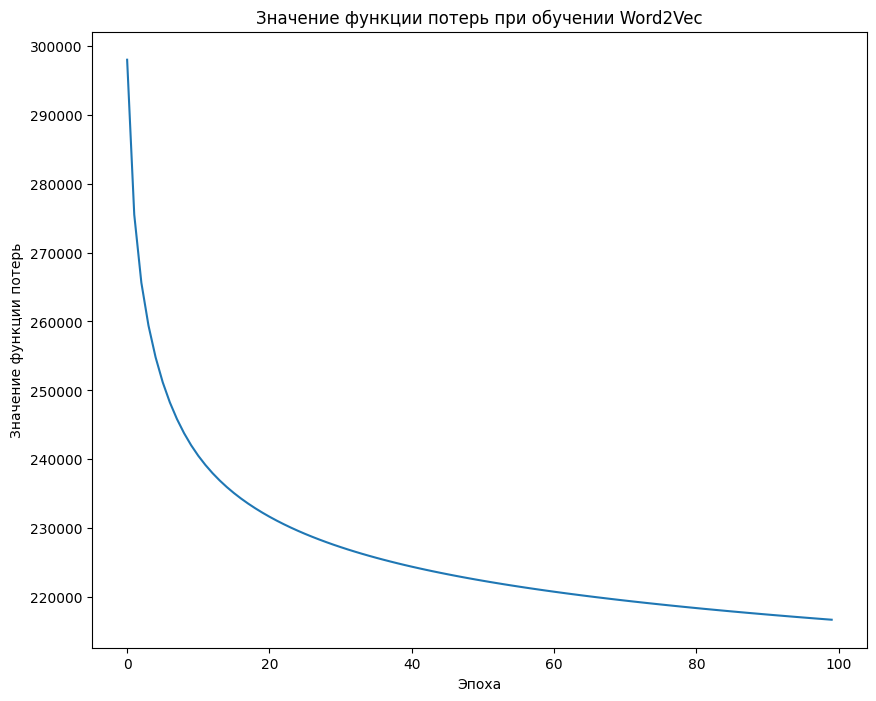

In [214]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(losses)
plt.xlabel("Эпоха")
plt.ylabel("Значение функции потерь")
plt.title("Значение функции потерь при обучении Word2Vec")
plt.show()

In [ ]:
Снизим размерность с помощью обучения на t_SNE и визуализируем 500 эмбэддингов для лучшей читаемости и 
интерпретируемости результатов.

IndexError: index 500 is out of bounds for axis 0 with size 500

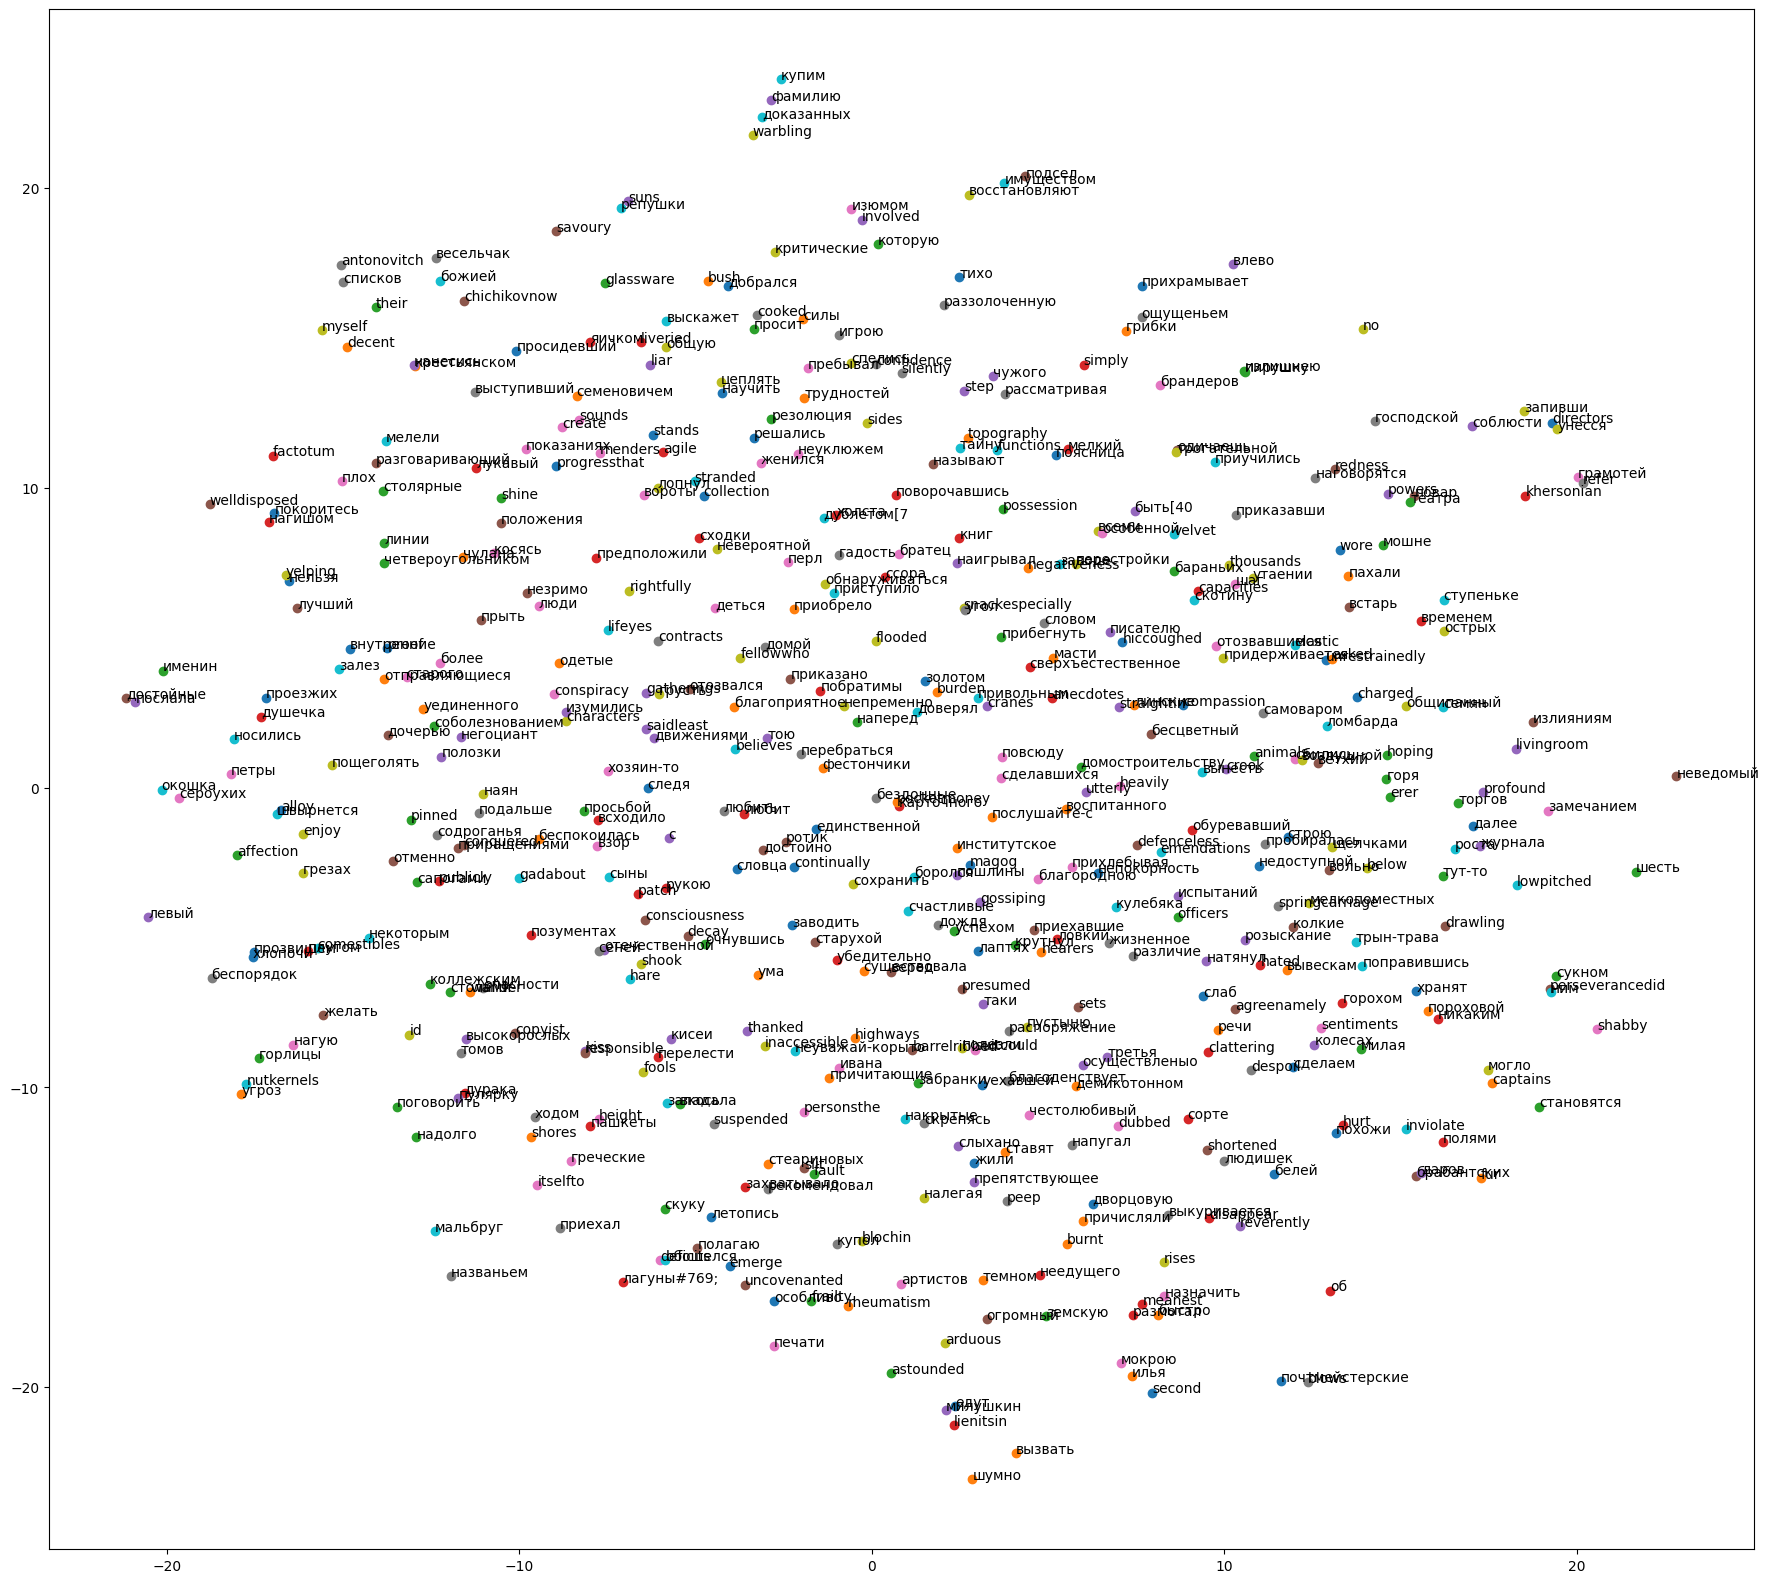

In [221]:
from sklearn.manifold import TSNE

embeddings = model.embeddings.weight.data.numpy()
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings[:500])

plt.figure(figsize=(22,20))
for i, word in enumerate(vocab):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title('Эмбеддинги Word2Vec')
plt.show()

In [ ]:
Визуализация показывает, что эмбэддинги на русском и английском языках довольно-таки разрозненные, 
что связано с большим значением функции потерь. Однако можно наблюдать, 
что в некоторых местах модель неплохо угадала контекстуальную близость эмбэддингов.
Так, слово "мальбург"(город в Германии) близко к словам "названьем" и "приехал", а действие "купим"
близко к слову "фамилию", что соотвествует сюжету мертвых душ.
Так что можно говорить о том, что продолжение обучения поможет добиться результатов лучше и релеватнее,
чем то, что удалось получить в ходе экспериментального обучения.

In [ ]:
Теперь попытаемся сравнить близость эмбэддингов для персонажей гоголевской поэмы. 
Возьмём эмбеддинги для Чичикова и Ноздрёва.

In [236]:
word_1 = 'чичиков'
word_idx_1 = word_to_idx[word_1]
embedding_1 = model.embeddings(torch.tensor(word_idx_1).long()).detach().numpy()
print(f"Эмбеддинг для слова '{word_1}': {embedding_1}")

Эмбеддинг для слова 'чичиков': [ 0.13579747  1.4128888  -0.9798885   2.102198    2.6106946   3.07922
 -1.0893526   0.32500714  1.4463675  -1.49098   ]


In [237]:
word_2 = 'chichikov'
word_idx_2 = word_to_idx[word_2]
embedding_2 = model.embeddings(torch.tensor(word_idx_2).long()).detach().numpy()
print(f"Эмбеддинг для слова '{word_2}': {embedding_2}")

Эмбеддинг для слова 'chichikov': [-1.3140179  -1.8817254   1.1404291  -0.7812323   0.4348001  -0.24778903
  0.06177545  1.0243224  -1.5360723   4.4135847 ]


In [238]:
word_3 = 'ноздрев'
word_idx_3 = word_to_idx[word_3]
embedding_3 = model.embeddings(torch.tensor(word_idx_3).long()).detach().numpy()
print(f"Эмбеддинг для слова '{word_3}': {embedding_3}")

Эмбеддинг для слова 'ноздрев': [ 0.29186976  1.4457744  -2.0756817   0.7288925  -0.04167495  1.1896865
  0.7067521  -1.3153726   0.6812593   0.7355944 ]


In [239]:
word_4 = 'nozdrev'
word_idx_4 = word_to_idx[word_4]
embedding_4 = model.embeddings(torch.tensor(word_idx_4).long()).detach().numpy()
print(f"Эмбеддинг для слова '{word_4}': {embedding_4}")

Эмбеддинг для слова 'nozdrev': [-0.8102494  -0.4050345   1.9898384   0.4234728  -1.7508354  -0.34922674
  0.9511899   0.5715357  -2.3733747   1.3248475 ]


In [241]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_ru = cosine_similarity([embedding_1], [embedding_3])[0][0]
print(f"Косинусное сходство между Чичиковым и Ноздрёвым: {similarity_ru:.4f}")

Косинусное сходство между Чичиковым и Ноздрёвым: 0.4270


In [243]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_en = cosine_similarity([embedding_2], [embedding_4])[0][0]
print(f"Косинусное сходство между Чичиковым и Ноздрёвым: {similarity_en:.4f}")

Косинусное сходство между Чичиковым и Ноздрёвым: 0.5867


In [ ]:
Как мы видим, несмотря на взаимодейсвие Ноздрёва и Чичикова в "Мертвых душах" Н. В. Гоголя,
косинусное сходство между их, что русскими эмбэддингами, что английскими довольно низкое, что говорит о 
том, что герои встречаются в весьма разных контекстах. При этом контектуальная близость в английском 
переводе всё же выше.